# 확률적 경사 하강법(SGD, Stochastic Gradient Descent)
- "랜덤하게 경사(기울기)를 내려가는 방법"<br>
- 점진적 학습의 최적화 방법 중 하나<br>
cf) 점진적 학습: 모델 서비스 도중 업데이트(온라인 학습) / 모델 서비스 중지하고 업데이트 후 재개
- ML/DL 알고리즘을 훈련하는(최적화하는) 방법<br>
- 훈련 세트에서 샘플 한 개를 랜덤하게 선택하여 경사를 내려감(모든 샘플을 다 사용할 때까지).
- 훈련 세트를 한 번 모두 사용하는 과정을 **에포크(epoch)**라고 함.
<br><br>
- **미니배치 경사 하강법(minibatch gradient descent)**: 무작위로 몇 개의 샘플을 선택해서 경사를 내려감.
  - <u>실전에서 많이 사용됨</u>.
<br><br>
- **배치 경사 하강법(batch gradient descent)**: 전체 샘플을 사용해서 경사를 내려감.
  - 전체 데이터를 사용하기 때문에 가장 안정적인 방법일 수 있으나, 컴퓨터 자원을 많이 사용하게 됨.
  - 데이터가 너무 많으면 한 번에 전체 데이터를 모두 읽을 수 없을 수 도 있음.
<br><br>
- 신경망 알고리즘(Neural Network, DL)에서는 확률적 경사 하강법을 꼭 사용.
  - 신경망은 일반적으로 많은 데이터를 사용하기 때문에, **확률적 경사 하강법** 또는 **미니배치 경사 하강법**을 사용함.
<br><br>

- cf) 경사를 너무 빨리 내려올 경우, 아래의 그림 중 3번째 그림과 같이 될 수 있다.
<img src='https://miro.medium.com/max/600/1*Q-2Wh0Xcy6fsGkbPFJvMhQ.gif'><br>
<small><font color='gray'>출처: https://medium.com/x8-the-ai-community/gradient-descent-intuition-how-machines-learn-d29ad7464453</font></small><br>

In [1]:
# 17'00쯤 ~

# 손실함수
- 어떤 문제에서 ML알고리즘이 얼마나 엉터리인지를 측정하는 함수
- 비용함수(cost function)과 동의어로 볼 수 있다.
  - 엄밀히 따지면, 손실함수는 샘플 하나에 대한 손실을 정의
  - 비용함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 뜻함.
<br><br>
- **확률 경사 하강법**은 **이 <u>손실함수 값이 작아지도록</u> 가중치(기울기), 편향(절편) 값들을 업데이트 하는 것**이다.
- 손실함수는 미분가능해야한다.
  - 분류문제의 정확도(accuracy)는 미분이 가능하지 않기때문에, 즉 연속적이지 않기 때문에 손실함수로 사용할 수 없는 측정방법 중 하나이다.
  - ex) 4개의 샘플에 대해 정확도는 0, 0.25, 0.5, 0.75, 1 다섯가지 뿐이다. → **연속적이지 않기 때문에 경사하강법을 사용할 수 없음.**
  - 따라서 분류문제에서는 **정확도(accuracy)로 성능을 측정**하지만, 모델을 최적화할 때는 다른 손실함수를 쓴다.
- 분류일 때, 손실함수로 **로지스틱 손실 함수(logistic loss function)** 또는 **이진 크로스 엔트로피 손실 함수(binary cross-entropy loss function)**를 쓴다.
<br><br>
- cf) 회귀의 경우, 미분 가능한 **평균 절대값 오차(MAE) 또는 평균 제곱 오차(MSE)**를 손실함수로 사용할 수 있다.
  - 따라서 **회귀에서는 손실함수와 측정지표를 동일하게** 가져갈 수 있다.

# 로지스틱 손실 함수(logistic loss function)
- 또는 이진 크로스 엔트로피 손실 함수(binary cross-entropy loss function)


ex)<br>
예측$\quad$정답(타겟)$\quad$예측확률<br>

$\;1\quad=\quad1$$\quad\quad\quad\quad$0.9<br>
$\;0\quad\neq\quad1$$\quad\quad\quad\quad$0.3<br>
$\;0\quad=\quad0$$\quad\quad\quad\quad$0.2<br>
$\;1\quad\neq\quad0$$\quad\quad\quad\quad$0.8<br><br>

$\quad\quad\quad\quad\quad\Downarrow$<br><br>

- 정답이 1일 경우, `(-1) * 1(양성클래스) * 예측확률`<br>
- 정답이 0일 경우, 양성클래스처럼 바꿔서 처리한다.
 `(-1) * 1(양성클래스) * (1 - 예측확률)`<br>

예측$\quad$정답(타겟)$\quad$예측확률$\quad$손실<br>

$\;1\quad\neq\quad1$$\quad\quad\quad\quad$0.9$\quad$$\quad$-0.9 (-1 * 1 * 0.9)<br>
$\;0\quad\neq\quad1$$\quad\quad\quad\quad$0.3$\quad$$\quad$-0.3 (-1 * 1 * 0.3)<br>
$\;0\quad=\quad0$$\quad\quad\quad\quad$0.2$\quad$$\quad$-0.8 (-1 * 1 * (1 - 0.2))<br>
$\;1\quad\neq\quad0$$\quad\quad\quad\quad$0.8$\quad$$\quad$-0.2 (-1 * 1 * (1 - 0.8))<br><br>

예측 확률을 사용해 이런 식으로 계산하면 연속적인 손실 함수를 얻을 수 있다.<br>
여기에서 예측 확률에 로그 함수를 적용하면 더 좋다.<br>
예측 확률의 범위는 0~1 사이인데 로그함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 되기 때문이다.<br>
또한 로그함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.<br><br>
cf) 로그함수<br><br>
<img src='https://ww.namu.la/s/d6acfbc3de1edf2cdb37867f48bfeb687549fba33195a7448d84defb13b41ba458e90f57e6808be2fa4faf7c2ee25568e8af44ff1e272af1e39daac6cac97e377b4c52f82210f30658dbb7fea51972cf' width=400><br>
<small><font color='gray'>출처: https://namu.wiki/w/%EB%A1%9C%EA%B7%B8%ED%95%A8%EC%88%98</font></small><br>

타겟 = 1일 때: $-log(예측 확률)$<br>
타겟 = 0일 때: $-log(1-예측 확률)$<br>

cf) $-log x = log_{\frac{1}{10}} x$<br>
<img src='https://mblogthumb-phinf.pstatic.net/MjAxOTEwMjBfMjcx/MDAxNTcxNTczOTkzNjg2.Mrzu4T_rYP8dRBz1udLWCpcbMq_WZRuEvQwaI8-iUVYg.yMDuR3PP8N0KghQ698wa5mzyZasX5aSn4zh2a394HZog.PNG.ppos78/%EC%A7%80%EC%88%98%ED%95%A8%EC%88%98%EC%99%80-%EB%A1%9C%EA%B7%B8%ED%95%A8%EC%88%98%EC%9D%98-%EA%B7%B9%ED%95%9C-01.png?type=w2'><br>
- cf) a가 10일때와 $\frac{1}{10}$일 때를 가정<br>
<small><font color='gray'>출처: https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=ppos78&logNo=221683505743</font></small><br>



In [ ]:
# 31'38부터

## 데이터 전처리

In [1]:
import pandas as pd

In [4]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
x = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
y = fish['Species'].to_numpy()

In [5]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# 경사 하강법 사용을 위해선 특성마다 스케일이 같아야한다.
# 스케일이 다르다면 경사를 공평하게 평가할 수 없다.
# 따라서 경사 하강법 알고리즘을 사용할 때에는 반드시 데이터를 전처리해서 표준점수로 특성의 스케일을 바꿔줘야한다.
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

## SGDClassifier
- 사이킷런에서 제공하는 확률적 경사 하강법 알고리즘
  - 배치 또는 미니배치 경사 하강법은 지원하지 않음
- 회귀 문제일 경우, SGDRegressor
- 머신러닝 모델이 아니라 머신러닝 모델을 최적화하는 방법 중 하나이다.
  - loss 하이퍼파라미터에서 어떤 모델을 최적화할 지 정해준다.

In [32]:
# 불러오기
from sklearn.linear_model import SGDClassifier

In [33]:
# 선언하기  # max_iter: 훈련 세트를 몇 번 사용할 지(=epochs)
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)

- loss 속성값으로 log를 준 것은 로지스틱 손실함수(이진 크로스엔트로피 손실함수)를 사용한다는 뜻이다.
- 따라서 로지스틱 회귀모델을 훈련(최적화)한다는 것이다.

In [34]:
# 학습하기  # train_scaled를 써서 train셋을 한 번에 다 쓰는 "배치 경사 하강법"인것 같지만 여기서 하나씩 꺼내서 쓴다.
sc.fit(train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [35]:
# 평가하기
print(sc.score(train_scaled, y_train))  # 분류 문제이기 때문에 정확도(accuracy), 회귀라면 r2
print(sc.score(test_scaled, y_test))

0.773109243697479
0.775


#### partial_fit(): 기존에 학습했던 w(가중치)와 b(편향)을 유지하면서 다시 또 훈련하는 것

In [41]:
# partial_fit(): 기존에 학습했던 w(가중치)와 b(편향)을 유지하면서 다시 또 훈련하는 것
sc.partial_fit(train_scaled, y_train)

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [42]:
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.8067226890756303
0.8


## 에포크와 과대/과소적합

### 조기종료(Early Stopping)
- 과대적합이 시작하기 전에 훈련을 멈추는 것

In [43]:
import numpy as np

In [44]:
sc = SGDClassifier(loss='log', random_state=42)

In [45]:
train_score = []
test_score = []
classes = np.unique(y_train)

#### partial_fit()
 - 앞에 fit()을 안 써주면 이 모델이 찾아야될 클래스 개수를 알 수 없다.
 - partial_fit()는 훈련세트의 일부분만 주어질 수 있다고 가정한다.
 - 따라서 partial_fit()만 쓸 경우에는 매개변수로 classes를 줘서 클래스들을 알려줘야 한다.

In [46]:
for _ in range(0, 300):
  sc.partial_fit(train_scaled, y_train, classes=classes)
  train_score.append(sc.score(train_scaled, y_train))
  test_score.append(sc.score(test_scaled, y_test))

In [47]:
import matplotlib.pyplot as plt

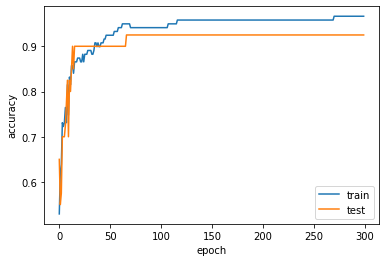

In [55]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

- epoch가 약 100일 때, train과 test 차이가 제일 적다.
- 그 이상 학습하는 것은 자원낭비로 볼 수 있다.
  - 과대적합이기도 하다.

In [49]:
# 따라서 이번엔 max_iter에 100만 준다.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)

In [50]:
sc.fit(train_scaled, y_train)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [51]:
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.957983193277311
0.925


In [52]:
# hinge는 SVM알고리즘을 의미한다.
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)

In [53]:
sc.fit(train_scaled, y_train)

SGDClassifier(max_iter=100, random_state=42, tol=None)

In [54]:
print(sc.score(train_scaled, y_train))
print(sc.score(test_scaled, y_test))

0.9495798319327731
0.925
